<a href="https://colab.research.google.com/github/kimmie-78/Water-Quality/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from collections import Counter

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from google.colab import files

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#Import the dataset

In [ ]:
upload = files.upload()

Saving waterQuality1.csv to waterQuality1.csv


#Loading in the data as a csv file


In [ ]:
dataset = pd.read_csv('waterQuality1.csv')
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Getting basic information about the dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.280,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.0,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.0,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.0,0.000,0.220,0.610,1.00
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.700,1.00


#Exploratory Data Analysis

# Count amount of each value in the Potability column

In [ ]:
dataset['is_safe'].value_counts()

,count
is_safe,
0,7084
1,912
#NUM!,3


In [ ]:
dataset.dropna(inplace=True)

# Create subplot and pie chart

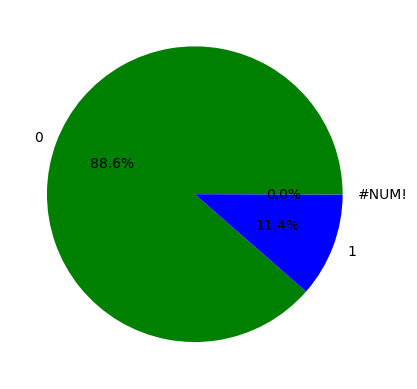

In [ ]:
fig1, ax1 = plt.subplots()
# Get the value counts and their corresponding index as labels
values = dataset['is_safe'].value_counts()
labels = values.index

# Define green and blue as string literals
green = 'green'
blue = 'blue'

ax1.pie(values, colors=[green, blue], labels=labels, autopct='%1.1f%%', startangle=0, rotatelabels=False)
plt.show() # Add this line to display the pie chart

# Define a list of features to be plotted

In [ ]:
dataset.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
feature = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium']

# Drop Potability column

<ipython-input-12-ca0117f00c1d>:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(
<ipython-input-12-ca0117f00c1d>:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(
<ipython-input-12-ca0117f00c1d>:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(
<ipython-input-12-ca0117f00c1d>:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(
<ipython-input-12-ca0117f00c1d>:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(
<ipython-input-12-ca0117f00c1d>:11: UserWarning: 
The palette list has fewer values (2) than needed (3) a

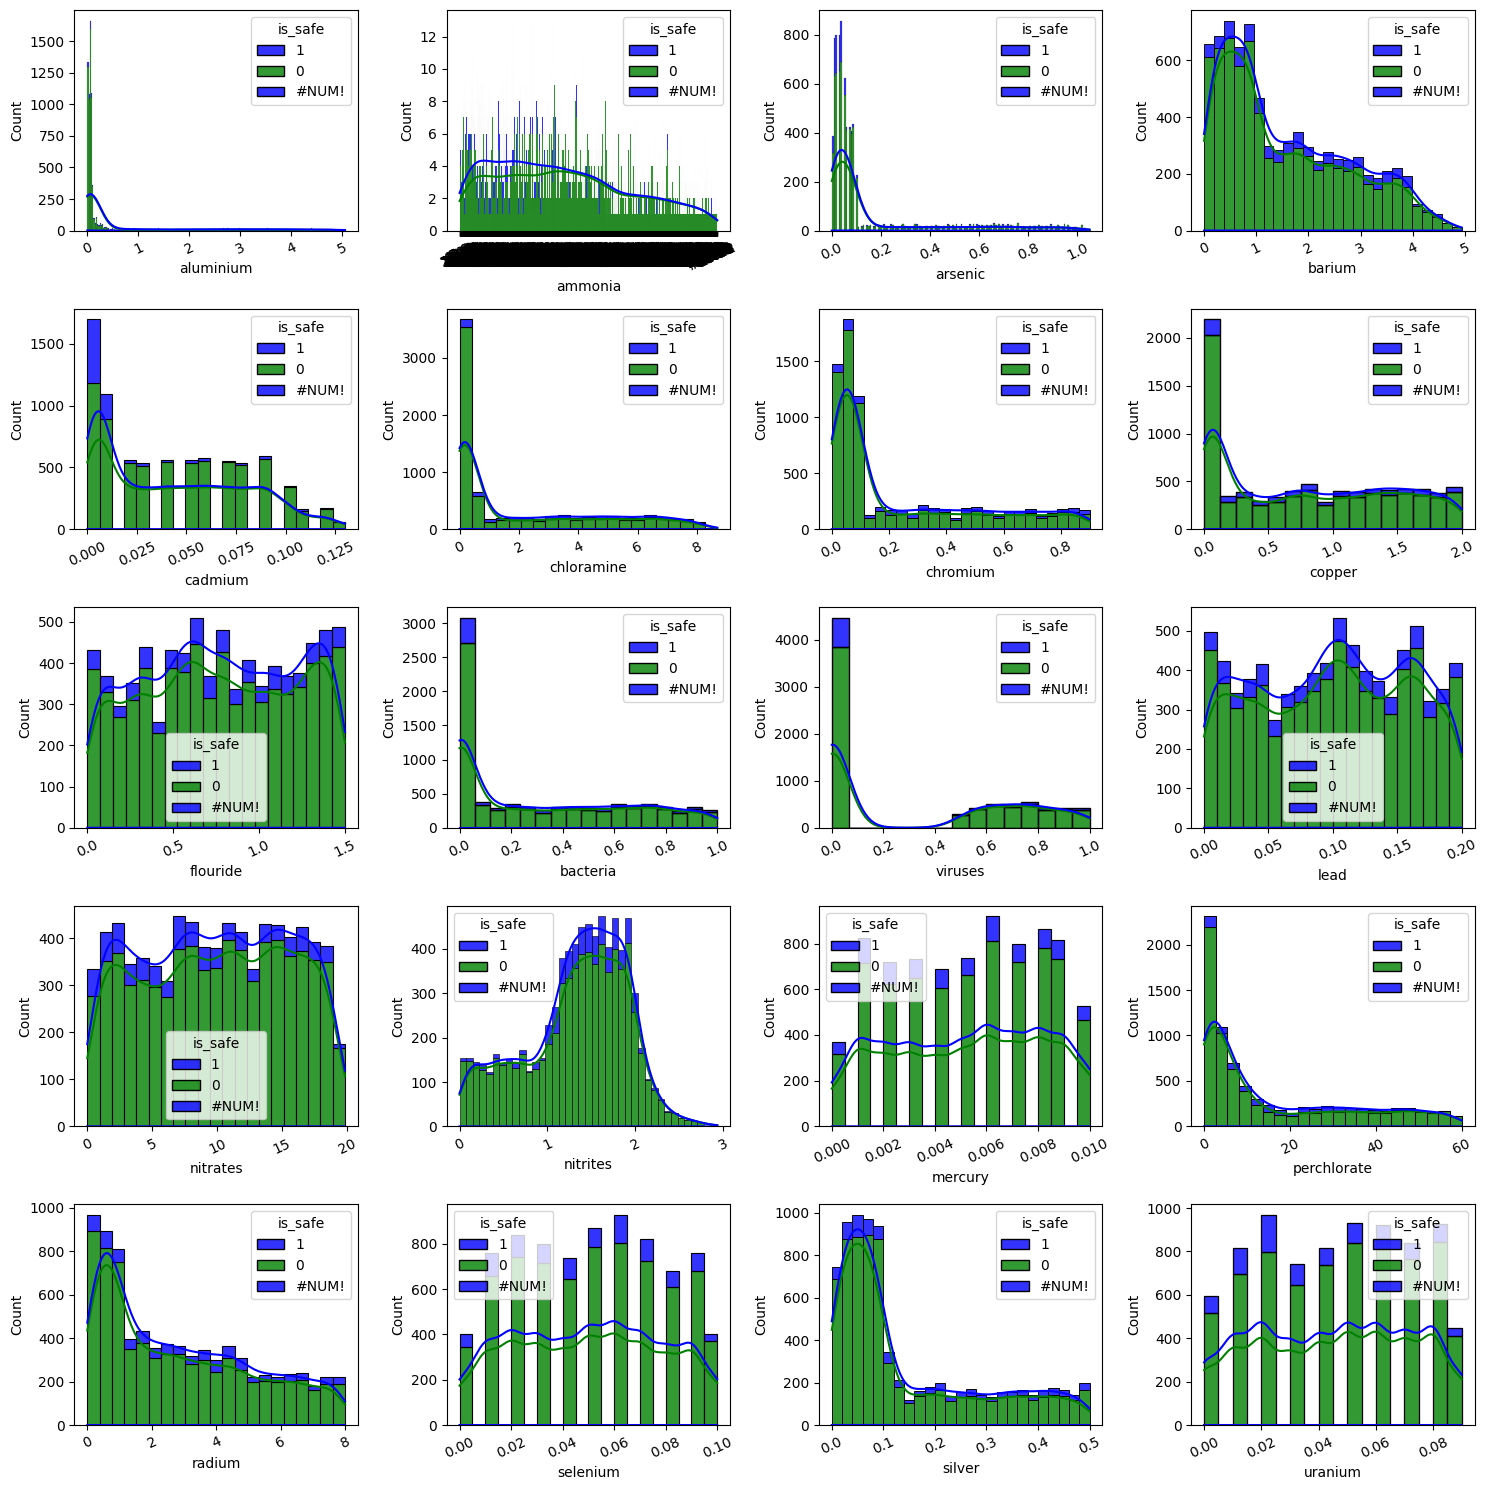

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 15))

# Iterate through the feature list and plot a histlpot
for i in range(len(feature)): # Use range(len(feature)) for correct indexing
    plt.subplot(5, 4, i+1) # Adjust grid layout to 5x4 to accommodate all features

    # Histlot plotting the fetures in the dataset
    sns.histplot(
        data = dataset, # Use 'dataset' instead of 'plotter_dataset'
        x = feature[i], # Access feature using feature[i]
        hue = dataset['is_safe'],
        palette= [blue, green],
        kde = True,
        multiple='stack',
        alpha=0.8
    )

    # Rotate the xticks for better readability
    plt.xticks(rotation = 25)

plt.tight_layout() # Adjust spacing between subplots
plt.show()

#Further filtering of the data

# Define a plotting function

In [ ]:
def mask_plotter(column, mask1, mask2, label1, label2, color2, title):
    # Set size and stlye
    plt.figure(figsize=(5, 5))
    plt.style.use('ggplot')

    # Create to histplots
    sns.histplot(data=dataset[mask1], x=column, multiple='stack', color=blue, label=label1) # Save
    sns.histplot(data=dataset[mask2], x=column, multiple='stack', color=color2, label=label2)

    # Add title, legend and show plot
    plt.title(title)
    plt.legend()
    plt.show()

#Data preparation

# Plot out missing values

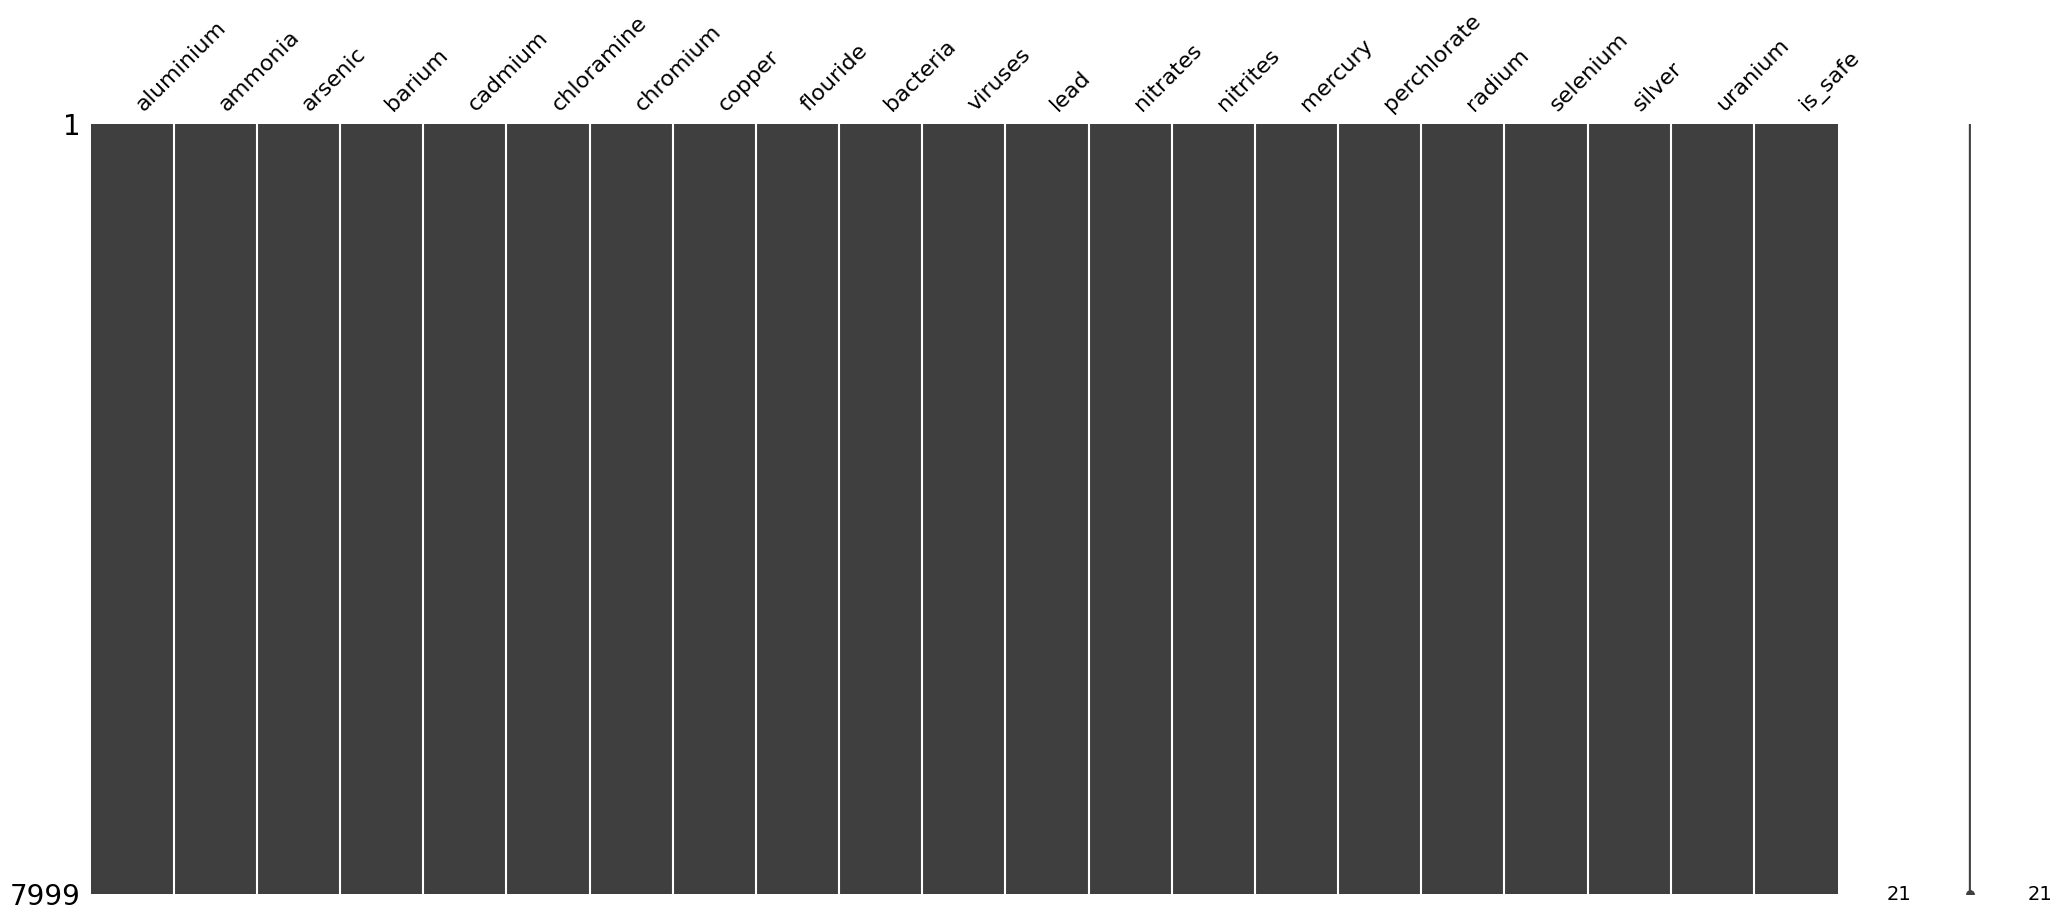

In [ ]:
fig = msno.matrix(dataset) # show if there are any missing values

# Checking if there are missing values left

In [ ]:
dataset.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


#Checking for correlations

# Set figure size

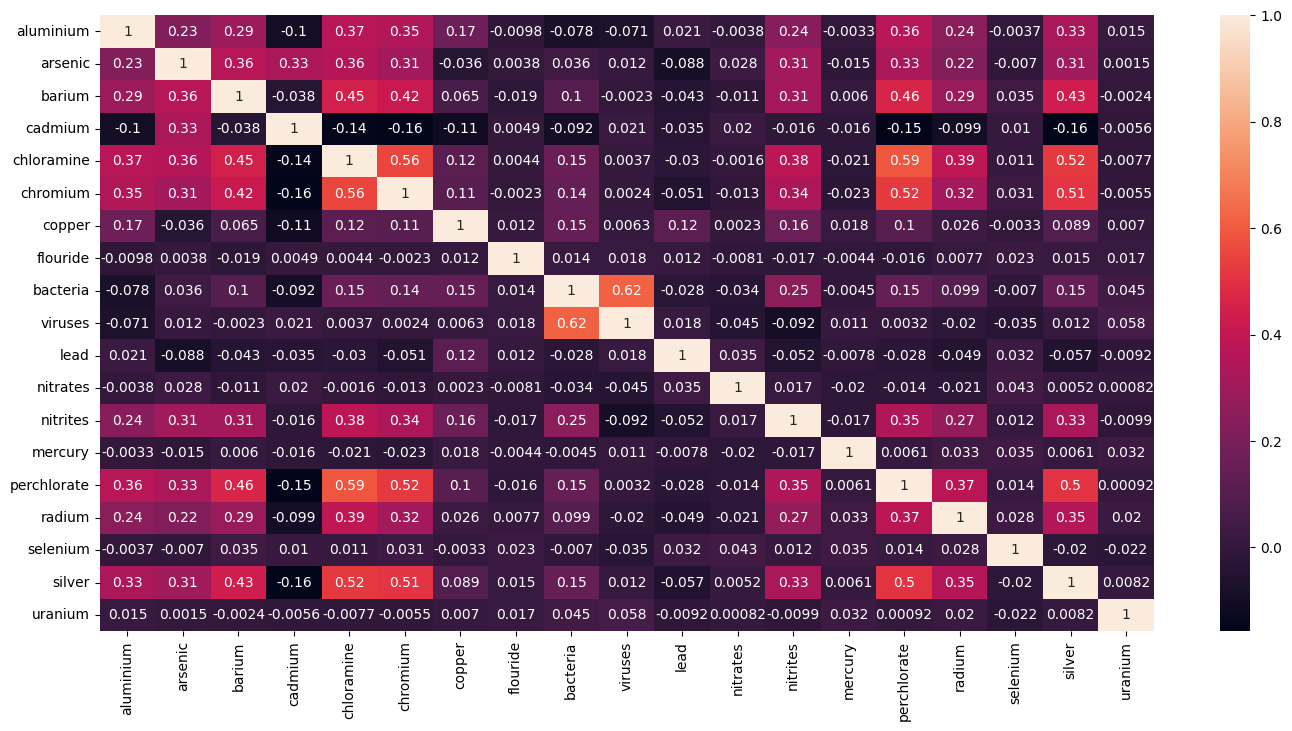

In [ ]:
# Increase figure size for a larger heatmap
plt.figure(figsize=(17, 8))

# Replace '#NUM!' with NaN and calculate correlation on numerical columns only
sns.heatmap(dataset.replace('#NUM!', np.nan).corr(numeric_only=True), annot=True)

# Show plot
plt.show()

# Setting features (X) and targets(y)

In [ ]:
X = dataset.drop('is_safe', axis=1)
y = dataset['is_safe']

#Training and testing dataset

# Split data into training and testing dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'dataset' is a pandas DataFrame, replace non-numerical values with NaN
dataset = dataset.replace('#NUM!', pd.NA)

# Drop rows with missing values
dataset = dataset.dropna()

# Now proceed with the splitting and scaling
X = dataset.drop('is_safe', axis=1)
y = dataset['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Undersampling
# from imblearn.under_sampling import RandomUnderSampler

# undersampler = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Creatre figure and list containing axes

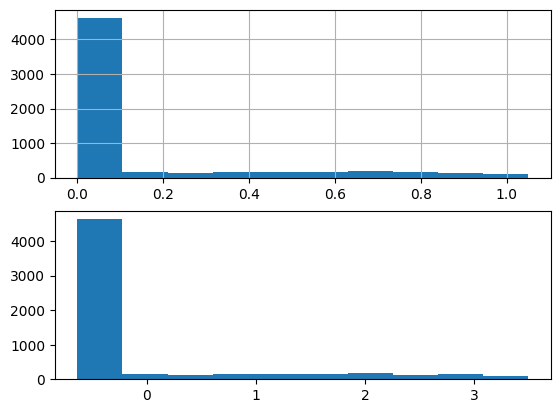

In [ ]:
fig, ax = plt.subplots(2, 1)

# Plot histogram of before and after scaling
X_train.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(X_train_scaled[:, 2])
plt.show()

#Building a model

##Randomized, cross validated search

####Time to build a machine learning model. To determine what makes, potable water, five different machine learning algortihms are going to be used. To get (relatively) good results, a cross validated random search is used on every model.

####The random search randomly seelcts parameters from a predefined grid and to find the best results within these parameters. Computing the results of all the possible paramters would be computationally expensive. Doing a random search saves both time and computational power. After all models have gone through a randomized search, the best model will be selected. To get the absolute best results from that model, a grid search is performed, where all possible cominations of parmateres are tested to find out the best parameters.

# Set up all the models that are to be tested

In [ ]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xgb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
sm = SVC()

## sm param grid

In [ ]:

sm_params = {
    # 'C' : np.linspace(0, 5, 10),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

# Instantiate cross validated support vector machine random search
rs_sm = RandomizedSearchCV(estimator=sm, param_distributions=sm_params, cv=5)

# Fit sm to training data
rs_sm.fit(X_train, y_train)
print(rs_sm.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'kernel': 'linear'}


## lr param grid

In [ ]:
lr_params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0, 5, 10)}

# Instantiate cross validated logistic regression random search
rs_lr = RandomizedSearchCV(estimator=lr, param_distributions=lr_params, cv=5)

# Fit lr to trainig data
rs_lr.fit(X_train, y_train)
print(rs_lr.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'penalty': 'l2', 'C': 4.444444444444445}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Tracebac

## rfc param grid

In [ ]:
rfc_params = {
    'n_estimators' : [*range(25, 400, 20)],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated random forest random search
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, cv=5)

# Fit rfc to trainig data
rs_rfc.fit(X_train, y_train)
print(rs_rfc.best_params_)

{'n_estimators': 225, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 10, 'criterion': 'entropy'}


## dtc param grid

In [ ]:
dtc_params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [*range(1, 11)],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]}

# Instantiate cross validated desicion tree random search
rs_dtc = RandomizedSearchCV(estimator=dtc, param_distributions=dtc_params, cv=5)

# Fit dtc to trainig data
rs_dtc.fit(X_train, y_train)
print(rs_dtc.best_params_)

{'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini'}


## xgb param grid

In [ ]:
xgb_params = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : np.linspace(0, 1, 10),
    'n_estimators' : [*range(25, 500, 10)]}

# Instantiate cross validated extreme gradient boosting random search
rs_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, cv=5)

# Fit xgb to training data
rs_xgb.fit(X_train, y_train)
print(rs_xgb.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

{'n_estimators': 215, 'loss': 'exponential', 'learning_rate': 0.6666666666666666}


## knn param grid

In [ ]:
knn_params = {
    'n_neighbors' : [*range(1, 11)],
    'weights' : ['uniform', 'distant'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree' 'brute'],
    'leaf_size' : [10, 20, 30, 40]}

# Instantiate cross validated k-nearest neighbor random search
rs_knn = RandomizedSearchCV(estimator=knn, param_distributions=knn_params, cv=5)

# Fit knn to training data
rs_knn.fit(X_train, y_train)
print(rs_knn.best_params_)

{'weights': 'uniform', 'n_neighbors': 5, 'leaf_size': 20, 'algorithm': 'auto'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

#Selecting the best model

# Set up all models scores as a df

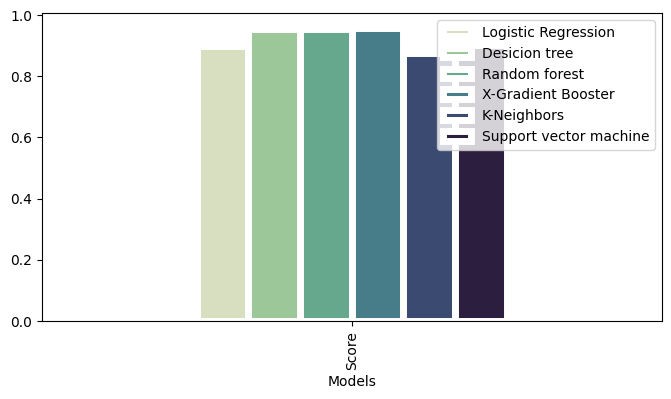

In [ ]:
score_df =  pd.DataFrame({'Logistic Regression' :  [rs_lr.best_score_] ,'Desicion tree' : [rs_dtc.best_score_], \
'Random forest' : [rs_rfc.best_score_],'X-Gradient Booster': [rs_xgb.best_score_] ,'K-Neighbors' : [rs_knn.best_score_], 'Support vector machine': [rs_sm.best_score_]})
score_df.index = ['Score']


# Plot bar plot
plt.style.use('default')
color_palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
score_df.plot(kind='bar', edgecolor='white', colormap=color_palette, linewidth=5, figsize=(8, 4), xlabel='Models')

# Show plot
plt.show()

#The best model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, precision_score, recall_score
# Set up the best classifiert
rfc_v02 = RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=265)
sm_v02 = SVC(C=1.0, kernel='linear')
dtc_v02 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter='best')
xgb_v02 = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=225)
knn_v02 = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=1, weights='uniform')

# Train it
rfc_v02.fit(X_train, y_train)
sm_v02.fit(X_train, y_train)
dtc_v02.fit(X_train, y_train)
xgb_v02.fit(X_train, y_train)
knn_v02.fit(X_train, y_train)

# Predict on unseen data
y_pred = rfc_v02.predict(X_test)
y_pred_sm = sm_v02.predict(X_test)
y_pred_dtc = dtc_v02.predict(X_test)
y_pred_xgb = xgb_v02.predict(X_test)
y_pred_knn = knn_v02.predict(X_test)

# Get the score of the model for rfc
print('Random Forest')
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize = True) * 100.0)
print('F1 score: ', f1_score(y_test, y_pred, pos_label='0')) # Set pos_label to '0'
print('Precision: ', precision_score(y_test, y_pred, pos_label='0')) # Set pos_label to '0'
print('Recall: ', recall_score(y_test, y_pred, pos_label='0')) # Set pos_label to '0'
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

print('-----------------------------------------------------------------------------------')

# Get the score of the model for sm
print('Support Vector Machine')
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred_sm, normalize = True) * 100.0)
print('F1 score: ', f1_score(y_test, y_pred_sm, pos_label='0')) # Set pos_label to '0'
print('Precision: ', precision_score(y_test, y_pred_sm, pos_label='0')) # Set pos_label to '0'
print('Recall: ', recall_score(y_test, y_pred_sm, pos_label='0')) # Set pos_label to '0'
print('Accuracy: ', accuracy_score(y_test, y_pred_sm))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_sm))
print('Classification report: \n', classification_report(y_test, y_pred_sm))

print('-----------------------------------------------------------------------------------')

# Get the score of the model for dtc
print('Desicion Tree')
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred_dtc, normalize = True) * 100.0)
print('F1 score: ', f1_score(y_test, y_pred_dtc, pos_label='0')) # Set pos_label to '0'
print('Precision: ', precision_score(y_test, y_pred_dtc, pos_label='0')) # Set pos_label to '0'
print('Recall: ', recall_score(y_test, y_pred_dtc, pos_label='0')) # Set pos_label to '0'
print('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_dtc))
print('Classification report: \n', classification_report(y_test, y_pred_dtc))

print('-----------------------------------------------------------------------------------')

# Get the score of the model for xgb
print('X-Gradient Booster')
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred_xgb, normalize = True) * 100.0)
print('F1 score: ', f1_score(y_test, y_pred_xgb, pos_label='0')) # Set pos_label to '0'
print('Precision: ', precision_score(y_test, y_pred_xgb, pos_label='0')) # Set pos_label to '0'
print('Recall: ', recall_score(y_test, y_pred_xgb, pos_label='0'))
print('Accuracy: ', accuracy_score(y_test, y_pred_xgb))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_xgb))
print('Classification report: \n', classification_report(y_test, y_pred_xgb))

print('-----------------------------------------------------------------------------------')

# Get the score of the model for knn
print('K-Neighbors')
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred_knn, normalize = True) * 100.0)
print('F1 score: ', f1_score(y_test, y_pred_knn, pos_label='0')) # Set pos_label to '0'
print('Precision: ', precision_score(y_test, y_pred_knn, pos_label='0')) # Set pos_label to '0'
print('Recall: ', recall_score(y_test, y_pred_knn, pos_label='0'))
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_knn))
print('Classification report: \n', classification_report(y_test, y_pred_knn))

Random Forest
Correct Prediction (%):  91.94597298649325
F1 score:  0.9564747228980804
Precision:  0.9175311203319502
Recall:  0.9988706945228685
Accuracy:  0.9194597298649325
Confusion matrix: 
 [[1769    2]
 [ 159   69]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1771
           1       0.97      0.30      0.46       228

    accuracy                           0.92      1999
   macro avg       0.94      0.65      0.71      1999
weighted avg       0.92      0.92      0.90      1999

-----------------------------------------------------------------------------------
Support Vector Machine
Correct Prediction (%):  90.99549774887443
F1 score:  0.9510070767555797
Precision:  0.9180241723594325
Recall:  0.9864483342744212
Accuracy:  0.9099549774887443
Confusion matrix: 
 [[1747   24]
 [ 156   72]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      

#Feature importances

# Get feature importance

<Figure size 640x480 with 0 Axes>

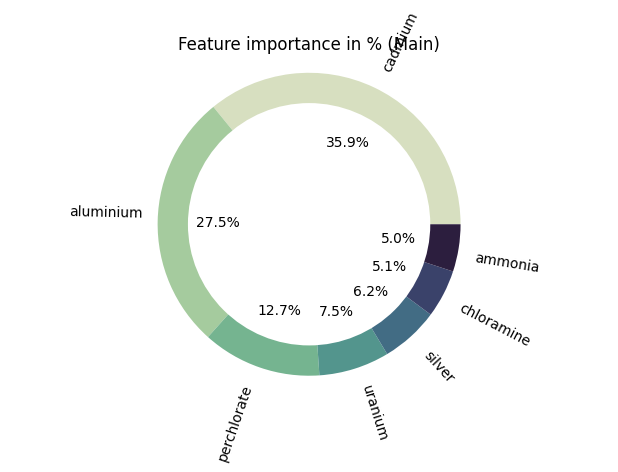

Features with importances from 0.0% to 4.0%:
nitrites: 0.03995502321497866
barium: 0.0
chromium: 0.0
copper: 0.0
flouride: 0.0
bacteria: 0.0
lead: 0.0
nitrates: 0.0
mercury: 0.0
arsenic: 0.0
radium: 0.0
selenium: 0.0
viruses: 0.0


In [ ]:
# Assuming 'dtc_v02' is your fitted DecisionTreeClassifier
feature_imp = pd.Series(dtc_v02.feature_importances_, index=X.columns).sort_values(ascending=False)

# Extract values from 0.0% to 4.0%
small_importances = feature_imp[feature_imp <= 0.04]

# Remaining importances for the pie chart
main_importances = feature_imp[feature_imp > 0.04]

# Clear matplotlib
plt.clf()

# Create subplot and pie chart for main importances
fig1, ax1 = plt.subplots()
ax1.pie(main_importances, colors=sns.cubehelix_palette(start=.5, rot=-.75, n_colors=len(main_importances)),
        labels=main_importances.index, autopct='%1.1f%%', startangle=0, rotatelabels=True)

# Draw circle
centre_circle = plt.Circle((0,0),0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Set tighten layout and show plot
plt.title('Feature importance in % (Main)')
plt.tight_layout()
plt.show()

# Display small importances individually with all decimal places
print("Features with importances from 0.0% to 4.0%:")
for feature, importance in small_importances.items():
    print(f"{feature}: {importance}")  # Print importance without formatting

<Figure size 640x480 with 0 Axes>

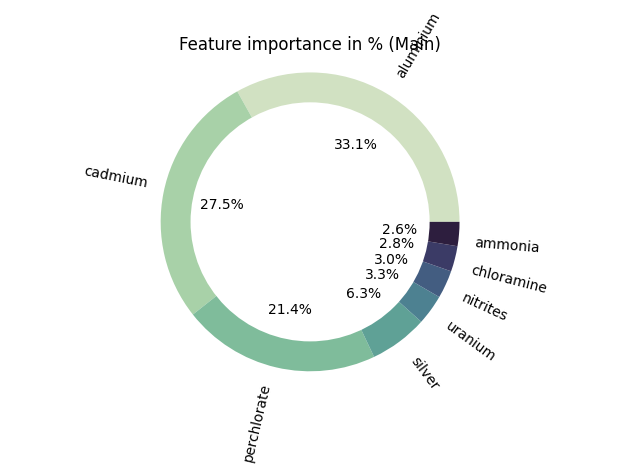

Features with importances from 0.0% to 2.1%:
viruses: 0.018147594796034797
arsenic: 0.0130959351705011
nitrates: 0.012589603970254671
radium: 0.008345404269955344
bacteria: 0.00792916364317853
copper: 0.006065689181974274
barium: 0.004819296222696636
chromium: 0.002963863441416189
flouride: 0.0014894098197113632
lead: 0.0013532065010675347
selenium: 0.0011806625366410873
mercury: 0.0009156388974859584


In [ ]:
# Assuming 'xgb_v02' is your fitted XGeradient Booster
feature_imp = pd.Series(xgb_v02.feature_importances_, index=X.columns).sort_values(ascending=False)

# Extract values from 0.0% to 2.1%
small_importances = feature_imp[feature_imp <= 0.021]

# Remaining importances for the pie chart
main_importances = feature_imp[feature_imp > 0.021]

# Clear matplotlib
plt.clf()

# Create subplot and pie chart for main importances
fig1, ax1 = plt.subplots()
ax1.pie(main_importances, colors=sns.cubehelix_palette(start=.5, rot=-.7, n_colors=len(main_importances)),
        labels=main_importances.index, autopct='%1.1f%%', startangle=0, rotatelabels=True)

# Draw circle
centre_circle = plt.Circle((0,0),0.80, fc='white') # Use plt.Circle to create the circle object
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Set tighten layout and show plot
plt.title('Feature importance in % (Main)')
plt.tight_layout()
plt.show()

# Display small importances individually with all decimal places
print("Features with importances from 0.0% to 2.1%:")
for feature, importance in small_importances.items():
    print(f"{feature}: {importance}")  # Print importance without formatting